In [2]:
import pandas as pd
import numpy as np

# SLE_juniors 

In [3]:
SLE = pd.read_csv('SLE_juniors.csv', sep = ';')

In [4]:
# Remove newline characters from column names
SLE.columns = SLE.columns.str.replace('\n', '')

In [5]:
# select columns with different dtype
int_cols = SLE.select_dtypes(include=['int64']).columns.tolist()
float_cols = SLE.select_dtypes(include=['float']).columns.tolist()
object_cols = SLE.select_dtypes(include=['object']).columns.tolist()

In [6]:
object_cols

['Full name',
 'BMI',
 'PRE (currently)',
 'CYC (total dose in grams)',
 'SF-36 (mental)',
 'SF-36  (physical)',
 'LupusQol',
 'Er (in debut)',
 'Er  (currently)',
 'Leu  (in debut)',
 'Leu (currently)',
 'Complement c3 (g/l)',
 'Complement C4 (g/l)',
 'Anti-dsDNA (in debut)',
 'Anti-dsDNA (currently)',
 'IFN-α',
 'TBS  L1-4',
 'HDL',
 'LDL',
 'AC',
 'CIRS (severity index)']

In [7]:
nan_rows = SLE[SLE['IFN-α'].isna()]

In [8]:
# changing for float columns (they are int, but with a few missed values)
for x in float_cols:
    # Mode in the column
    mode_x = SLE[x].mode()[0]
    
    # Replace NaN values in column with mode of the column
    SLE.loc[SLE[x].isna(), x] = mode_x
    
    # Convert the data type of column  to int
    SLE[x] = SLE[x].astype('int')

In [9]:
# Convert the data type of column to float
for x in object_cols:
    if (x != 'Full name'):
        #print (x, ' - ', SLE[x].isna().sum())
        # replace comma with period in column 
        SLE[x] = SLE[x].str.replace(',', '.')
        SLE[x] = SLE[x].astype(float)

In [10]:
# delete float columns with many NaN values
float_cols = SLE.select_dtypes(include=['float']).columns.tolist()
for x in float_cols:
    if (SLE[x].isna().sum() != 0):
        print (x, ' - ', SLE[x].isna().sum())
        SLE = SLE.drop(columns=[x])

IFN-α  -  23
TBS  L1-4  -  28
HDL  -  32
LDL  -  31
AC  -  30


In [11]:
SLE.dtypes.value_counts() 

int64      216
float64     15
object       1
dtype: int64

In [12]:
# select columns with different dtype
int_cols = SLE.select_dtypes(include=['int64']).columns.tolist()
float_cols = SLE.select_dtypes(include=['float']).columns.tolist()
object_cols = SLE.select_dtypes(include=['object']).columns.tolist()

# Print the float and object columns
print('int = ', len(int_cols))
print('float = ', float_cols)
print('object = ', object_cols)

int =  216
float =  ['BMI', 'PRE (currently)', 'CYC (total dose in grams)', 'SF-36 (mental)', 'SF-36  (physical)', 'LupusQol', 'Er (in debut)', 'Er  (currently)', 'Leu  (in debut)', 'Leu (currently)', 'Complement c3 (g/l)', 'Complement C4 (g/l)', 'Anti-dsDNA (in debut)', 'Anti-dsDNA (currently)', 'CIRS (severity index)']
object =  ['Full name']


In [13]:
SLE.to_csv('SLE_juniors_fixed.csv', index=False, sep = ';')

# SLA_adults

In [14]:
SLE_adults = pd.read_csv('SLE_adults.csv', sep = ';')

In [15]:
# Remove newline characters from column names
SLE_adults.columns = SLE_adults.columns.str.replace('\n', '')

In [16]:
SLE_adults.dtypes.value_counts() 

int64      208
object      22
float64      8
dtype: int64

In [17]:
# select columns with different dtype
int_cols_adults = SLE_adults.select_dtypes(include=['int64']).columns.tolist()
float_cols_adults = SLE_adults.select_dtypes(include=['float']).columns.tolist()
object_cols_adults = SLE_adults.select_dtypes(include=['object']).columns.tolist()

In [18]:
for x in float_cols_adults:
    print (x, ' - ', SLE_adults[x].isna().sum())

PRE (in the debut of SLE)  -  1
GFR <50%  -  1
Hb (in debut)  -  24
Tr (in debut)  -  24
ESR (in debut)  -  24
ANF (in debut)  -  13
Z-score Total  -  57
Heredity for CVD  -  3


In [19]:
# delete float columns with many missed values 
for x in float_cols_adults:
    if SLE_adults[x].isna().sum() > 15:
        SLE_adults = SLE_adults.drop(columns=[x])

In [20]:
# select float types after drop 
float_cols_adults = SLE_adults.select_dtypes(include=['float']).columns.tolist()

# fill missed values by median or mode and change type of column to int 
for x in float_cols_adults:
    if (x == 'PRE (in the debut of SLE)') or (x == 'ANF (in debut)'):
        # Median in the column
        median_x = SLE_adults[x].median()
        SLE_adults.loc[SLE_adults[x].isna(), x] = median_x
    else:
        # Mode in the column
        mode_x = SLE_adults[x].mode()[0]
        SLE_adults.loc[SLE_adults[x].isna(), x] = mode_x
    
    # Convert the data type of column  to int
    SLE_adults[x] = SLE_adults[x].astype('int')

In [21]:
# select columns with object dtype
object_cols_adults = SLE_adults.select_dtypes(include=['object']).columns.tolist()

for x in object_cols_adults:
    print (x, ' - ', SLE_adults[x].isna().sum())

Full name  -  0
Weight  -  0
BMI  -  0
PRE (currently)  -  0
CYC (total dose in grams)  -  0
SF-36 (mental)  -  4
SF-36  (physical)  -  4
LupusQol  -  5
Er (in debut)  -  25
Er  (currently)  -  1
Leu  (in debut)  -  24
Leu (currently)  -  0
Complement c3 (g/l)  -  0
Complement C4 (g/l)  -  0
Anti-dsDNA (in debut)  -  17
Anti-dsDNA (currently)  -  0
IFN-α  -  19
TBS  L1-4  -  34
HDL  -  17
LDL  -  17
AC  -  17
CIRS (severity index)  -  0


In [31]:
nan_rows = SLE_adults[SLE_adults['IFN-α'].isna()]

In [33]:
nan_rows['Full name']

0     Матвеева Екатерина Владимировна
6        Меркулова Регина Геннадьевна
8              Аладжян Гаяне Вагинаки
10          Ундасова Наталия Сргеевна
11              Парий Иван Михайлович
16         Клешнина Оксана Дмитриевна
21        Сычева Полина Александровна
22      Дидык Елизавета Александровна
24       Михайлова Марина геннадьевна
26      Бовсуновская татьяна ивановна
27                   Сейдиева Мухубат
35          Чучина Ольга Владимировна
41      Молокова Анастасия Алексеевна
43             Щелкова Анна Андреевна
49    Головащенко Светлана Викторовна
53         Омельчишина ЕленаСергеевна
54            Гордеева Елена Павловна
55    Старкова Александра Владимровна
56            Воронина Юлия Сергеевна
Name: Full name, dtype: object

In [22]:
# select columns with object dtype
object_cols_adults = SLE_adults.select_dtypes(include=['object']).columns.tolist()

for x in object_cols_adults:
    
    sum_nan_for_column = SLE_adults[x].isna().sum()
    
    if (sum_nan_for_column >= 17):
        SLE_adults = SLE_adults.drop(columns=[x])
        
    elif (sum_nan_for_column != 0):
        # convert column 'A' to numeric data type
        SLE_adults[x] = SLE_adults[x].str.replace(',', '.')
        SLE_adults[x] = SLE_adults[x].astype(float)

        # calculate median of column 'A'
        median_x = np.nanmedian(SLE_adults[x])

        # fill missing float values with median
        SLE_adults.loc[SLE_adults[x].isna(), x] = median_x
        
    elif (x != 'Full name'):
        # convert column 'A' to numeric data type
        SLE_adults[x] = SLE_adults[x].str.replace(',', '.')
        SLE_adults[x] = SLE_adults[x].astype(float)

In [23]:
# select columns with different dtype
int_cols = SLE_adults.select_dtypes(include=['int64']).columns.tolist()
float_cols = SLE_adults.select_dtypes(include=['float']).columns.tolist()
object_cols = SLE_adults.select_dtypes(include=['object']).columns.tolist()

# Print the float and object columns
print('int = ', len(int_cols))
print('float = ', float_cols)
print('object = ', object_cols)

int =  212
float =  ['Weight', 'BMI', 'PRE (currently)', 'CYC (total dose in grams)', 'SF-36 (mental)', 'SF-36  (physical)', 'LupusQol', 'Er  (currently)', 'Leu (currently)', 'Complement c3 (g/l)', 'Complement C4 (g/l)', 'Anti-dsDNA (currently)', 'CIRS (severity index)']
object =  ['Full name']


In [24]:
SLE_adults.to_csv('SLE_adults_fixed.csv', index=False, sep = ';')

# Add classes and join two tables

In [28]:
SLE_juniors = pd.read_csv('SLE_juniors_fixed.csv', sep = ';')
SLE_adults = pd.read_csv('SLE_adults_fixed.csv', sep = ';')

In [33]:
# get the set of column names for each dataframe
cols_juniors = set(SLE_juniors.columns)
cols_adults = set(SLE_adults.columns)

# find columns that exist only in one of the dataframes
only_in_juniors = cols_juniors - cols_adults
only_in_adults = cols_adults - cols_juniors

print(f"Columns only in juniors: {only_in_juniors}")
print(f"Columns only in adults: {only_in_adults}")

Columns only in juniors: {'Anti-dsDNA (in debut)', 'Er (in debut)', 'Leu  (in debut)', 'Tr (in debut)', 'Hb (in debut)', 'ESR (in debut)'}
Columns only in adults: set()


In [37]:
for x in only_in_juniors:
    SLE_juniors = SLE_juniors.drop(columns=[x])

In [51]:
SLE_juniors.dtypes.value_counts() 

int64      213
float64     13
object       1
dtype: int64

In [52]:
SLE_adults.dtypes.value_counts() 

int64      213
float64     13
object       1
dtype: int64

In [40]:
# add a column with the same value
SLE_juniors['Class'] = 0
SLE_adults['Class'] = 1

In [47]:
SLE_juniors['Weight'] = SLE_juniors['Weight'].astype(float)

In [48]:
float_cols_j = SLE_juniors.select_dtypes(include=['float']).columns.tolist()
float_cols_a = SLE_adults.select_dtypes(include=['float']).columns.tolist()

In [49]:
float_cols_j

['Weight',
 'BMI',
 'PRE (currently)',
 'CYC (total dose in grams)',
 'SF-36 (mental)',
 'SF-36  (physical)',
 'LupusQol',
 'Er  (currently)',
 'Leu (currently)',
 'Complement c3 (g/l)',
 'Complement C4 (g/l)',
 'Anti-dsDNA (currently)',
 'CIRS (severity index)']

In [50]:
float_cols_a

['Weight',
 'BMI',
 'PRE (currently)',
 'CYC (total dose in grams)',
 'SF-36 (mental)',
 'SF-36  (physical)',
 'LupusQol',
 'Er  (currently)',
 'Leu (currently)',
 'Complement c3 (g/l)',
 'Complement C4 (g/l)',
 'Anti-dsDNA (currently)',
 'CIRS (severity index)']

In [53]:
# concatenate the dataframes and reset the indexes
SLE_all = pd.concat([SLE_juniors, SLE_adults], ignore_index=True)

In [55]:
SLE_all.to_csv('SLE_all_fixed.csv', index=False, sep = ';')

# Start with PCA

In [92]:
SLE_param = pd.read_csv('SLE_all_fixed.csv', sep = ';')

In [93]:
SLE_param.dtypes.value_counts() 

int64      213
float64     13
object       1
dtype: int64

In [94]:
delete_columns = ['Full name', 'DOB', 'card number']

for x in delete_columns:
    SLE_param = SLE_param.drop(columns = [x])

In [95]:
SLE_param.to_csv('SLE_param.csv', index=False, sep = ';')

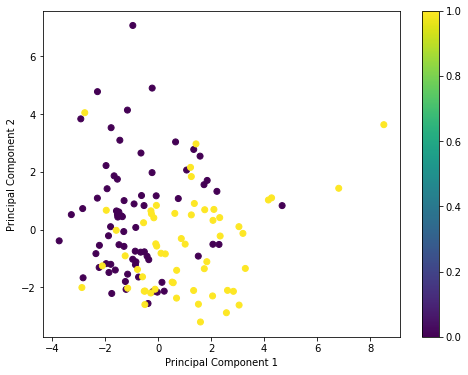

Explained variance ratio: [0.13422342 0.12055294 0.09445067]
Cumulative explained variance ratio: [0.13422342 0.25477636 0.34922703]


In [181]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('sle_many_values.csv', sep = ';')

# Separate the features and target class column
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Evaluate PCA
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', np.cumsum(pca.explained_variance_ratio_))


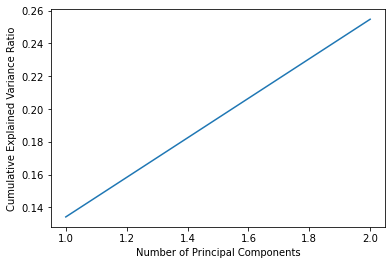

In [180]:
# calculate cumulative explained variance ratio
var_ratio = np.cumsum(pca.explained_variance_ratio_)

# plot cumulative explained variance ratio
plt.plot(range(1, len(var_ratio) + 1), var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [179]:
pc_loadings = pca.components_
pc_df = pd.DataFrame(pc_loadings.T, columns=['PC1', 'PC2'], index=X.columns)

pc_df['abs_PC1'] = pc_df['PC1'].abs()
pc_df['abs_PC2'] = pc_df['PC2'].abs()
pc_df = pc_df.sort_values(['abs_PC1', 'abs_PC2'], ascending=False)

print('Top features for PC1:')
print(pc_df.index[:10])

print('Top features for PC2:')
print(pc_df.index[10:20])

Top features for PC1:
Index(['BMI', 'Weight', 'Age at diagnosis', 'Age', 'Complement c3 (g/l)',
       'Age of SLE debut', 'Complement C4 (g/l)', 'Hb (currently)',
       'SF-36  (physical)', 'Er  (currently)'],
      dtype='object')
Top features for PC2:
Index(['CCI', 'Anti-dsDNA (currently)', 'LupusQol', 'ANF (currently)',
       'CiRS (general)', 'Number of exacerbations of SLE', 'ANF (in debut)',
       'Disease duration', 'Leu (currently)', 'SLEDAI-2K'],
      dtype='object')


In [333]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('sle_many_values.csv', sep = ';')
df = df.drop(columns=['Age of SLE debut'])
df = df.drop(columns=['Age at diagnosis'])
df = df.drop(columns=['Age'])

for i in range(1000):
    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2)

    # Fit a decision tree classifier on the training data with max_depth = 4
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = tree.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Accuracy: {accuracy:.2f}")
    if accuracy > 0.75:
        name = str(accuracy)
        # Export the decision tree to a dot file
        dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X_train.columns, class_names=['junior', 'adult'], impurity=False, proportion=False, precision=0, node_ids=False)

        # Convert the dot file to PDF using Graphviz
        graph = graphviz.Source(dot_data)
        graph.render(name)


In [326]:
accuracy

0.6923076923076923

In [325]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X_train.columns, class_names=['junior', 'adult'], impurity=False, proportion=False, precision=0, node_ids=False)

# Convert the dot file to PDF using Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree3")

'decision_tree3.pdf'

# SLE_param dataset

In [99]:
# Load data
df = pd.read_csv('SLE_param.csv', sep = ';')

In [153]:
# dictionary about how many unique values of features
# count_of_values : [names of features]

different_values = {}

for i in range(1, 130):
    different_values[i] = df.columns[df.nunique() == i].tolist()
    
count_of_different_values = {}
# count_of_values : [count of features]

for i in range(1, 130):
    if len(different_values[i]) != 0:
        count_of_different_values[i] = len(different_values[i])

In [154]:
# delete Class from params
different_values[2].remove('Class')
count_of_different_values[2] = 162

In [337]:
different_values[3]

['Constitutional', 'Hypertension', 'ENT', 'Peptic ulcer']

In [161]:
cols_one_value = different_values[1]
cols_binary_values = different_values[2]
cols_many_values = []

for key in different_values.keys():
    if key not in [1, 2, 3]:
        cols_many_values += different_values[key]
        
cols_one_value.append('Class')
cols_binary_values.append('Class')
cols_many_values.append('Class')

In [164]:
# select columns from dataframe using boolean mask
sle_one_value = df.loc[:, df.columns.isin(cols_one_value)]
sle_binary_values = df.loc[:, df.columns.isin(cols_binary_values)]
sle_many_values = df.loc[:, df.columns.isin(cols_many_values)]

In [168]:
# save csv with one value params, binary values and other as many values
sle_one_value.to_csv('sle_one_value.csv', index=False, sep = ';')
sle_binary_values.to_csv('sle_binary_values.csv', index=False, sep = ';')
sle_many_values.to_csv('sle_many_values.csv', index=False, sep = ';')

In [166]:
unique_values = df['Constitutional'].unique()
df[df['Constitutional'] == 4]

,Age,Gender,Age of SLE debut,Age at diagnosis,Disease duration,Heredity,Disability,Smoking,Height,Weight,...,Hypothyroidism,Migraine,Depression,Malignant tumors,Steroid osteoporosis,Heredity for CVD,CCI,CiRS (general),CIRS (severity index),Class
33,25,0,17,19,6,0,0,0,170,45.0,...,0,0,0,0,1,0,2,5,3.0,0
